In [1]:
import os 
from matplotlib import pyplot as plt
from natsort import natsorted

In [2]:
ROOT_DIR = "../../output/20240815/val_human_right/1.0/no_consistnacy"

plot_id:  [1, 2, 3, 4, 5, 6, 11, 16, 21, 26, 31, 36, 41, 46] losses:  [0.1277696191860984, 0.12757516081030998, 0.12758949701208622, 0.127615873110998, 0.1276710431003529, 0.1277660126782333, 0.1282564598011474, 0.12900162040411184, 0.1298277554888692, 0.13043781086181602, 0.13096788881139623, 0.13154318393363307, 0.13194642193822398, 0.13282846682911945]
min_loss_id:  1
min_loss:  0.12757516081030998
min_plot_id:  2


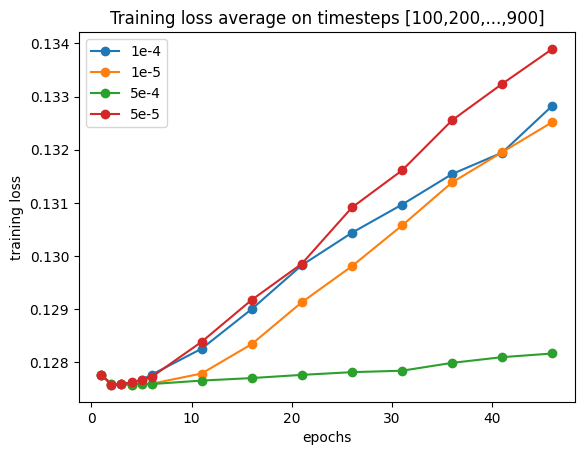

In [4]:
LRs = natsorted(os.listdir(ROOT_DIR))  
for lr in LRs:
    checkpoints = natsorted(os.listdir(os.path.join(ROOT_DIR, lr)))
    checkpoint_id = []
    avg_losses = []
    for checkpoint in checkpoints:
        # read all text files in directory and average to single float
        all_losses = []
        step_root_dir = os.path.join(ROOT_DIR, lr, checkpoint, 'lightning_logs/version_0/train_loss')
        step_dirs = natsorted(os.listdir(step_root_dir))
        for step_id in step_dirs:     
            for file in os.listdir(os.path.join(step_root_dir, step_id)):
                if file.endswith(".txt"):
                    with open(os.path.join(step_root_dir, step_id, file), 'r') as f:
                        all_losses.append(float(f.read()))       
        avg_loss = sum(all_losses) / len(all_losses)
        avg_losses.append(avg_loss)
        checkpoint_id.append(int(checkpoint.replace("chk",""))+1)
    plt.plot(checkpoint_id, avg_losses, 'o-', label=lr)
    if lr == "1e-4":
        print("plot_id: ", checkpoint_id, "losses: ", avg_losses)
        # find the location that has the lowest loss
        min_loss = min(avg_losses)
        min_loss_id = avg_losses.index(min_loss)
        print("min_loss_id: ", min_loss_id)
        print("min_loss: ", min_loss)
        # print min plot_id
        print("min_plot_id: ", checkpoint_id[min_loss_id])
    plt.legend()
    plt.xlabel("epochs")
    plt.ylabel("training loss")
    plt.title("Training loss average on timesteps [100,200,...,900]")